## Preparando ambiente



In [1]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Loading required package: raster

Loading required package: sp



In [2]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-27, (SVN revision 1148)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-6



In [3]:
install.packages('rpart')
require(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart



## Pontos de referência para treinamento

In [ ]:
pontosTreinamento = shapefile('cipef_poi.shp')
table(pontosTreinamento@data$class)


 1  2 
26 33 

In [ ]:
aoi = brick('cipef_50cm_v2.tif')
names(aoi) = c("red", "green", 'blue', 'alpha')
aoi = aoi[[-4]]

In [ ]:
sampvals = extract(aoi, pontosTreinamento, df = TRUE)
sampvals = sampvals[, -1]
sampdata = data.frame(classvalue = pontosTreinamento@data$class, sampvals)
head(sampdata)

,classvalue,red,green,blue
,<int>,<dbl>,<dbl>,<dbl>
1,1,91,88,66
2,1,87,96,53
3,1,76,77,51
4,1,72,89,48
5,1,50,65,32
6,1,60,74,33


## Treinamento

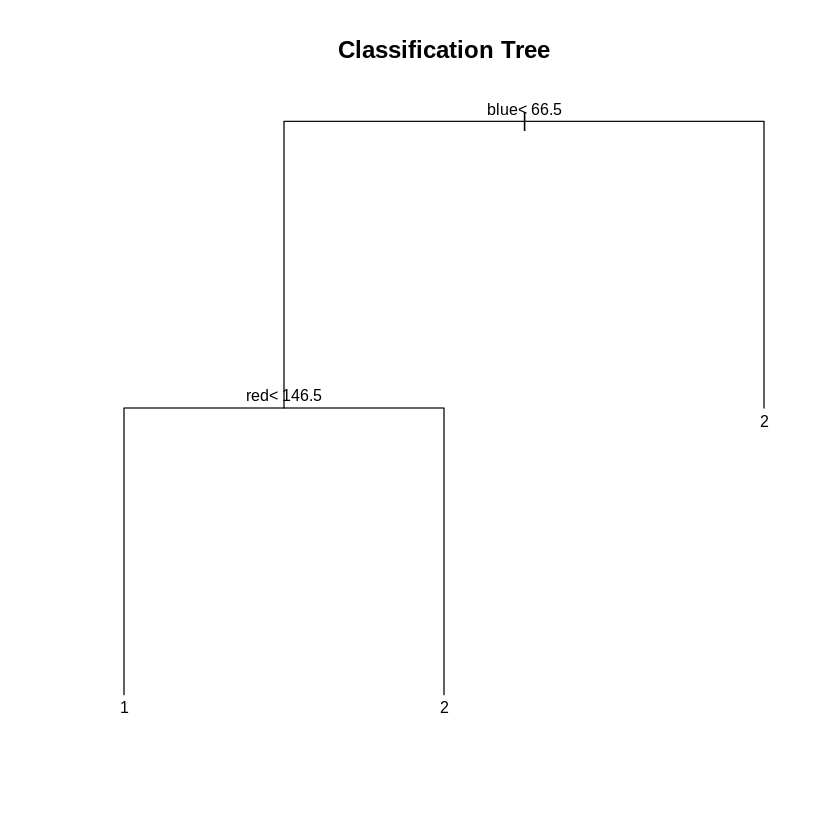

In [ ]:
cart <- rpart(as.factor(classvalue)~., data=sampdata, method = 'class', minsplit = 5)
plot(cart, uniform=TRUE, main="Classification Tree")
text(cart, cex = 0.8)

In [ ]:
summary(cart)

Call:
rpart(formula = as.factor(classvalue) ~ ., data = sampdata, method = "class", 
    minsplit = 5)
  n= 59 

          CP nsplit  rel error    xerror       xstd
1 0.92307692      0 1.00000000 1.0000000 0.14667101
2 0.07692308      1 0.07692308 0.1538462 0.07426975
3 0.01000000      2 0.00000000 0.1538462 0.07426975

Variable importance
 blue   red green 
   37    33    29 

Node number 1: 59 observations,    complexity param=0.9230769
  predicted class=2  expected loss=0.440678  P(node) =1
    class counts:    26    33
   probabilities: 0.441 0.559 
  left son=2 (28 obs) right son=3 (31 obs)
  Primary splits:
      blue  < 66.5  to the left,  improve=25.37046, (0 missing)
      red   < 104.5 to the left,  improve=20.00141, (0 missing)
      green < 97    to the left,  improve=16.74592, (0 missing)
  Surrogate splits:
      green < 98.5  to the left,  agree=0.898, adj=0.786, (0 split)
      red   < 104.5 to the left,  agree=0.881, adj=0.750, (0 split)

Node number 2: 28 observations

## Classificação

In [ ]:
imaClass = predict(aoi, cart, type='class')
imaClass

class      : RasterLayer 
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : 1, 2  (min, max)
attributes :
 ID value
  1     1
  2     2


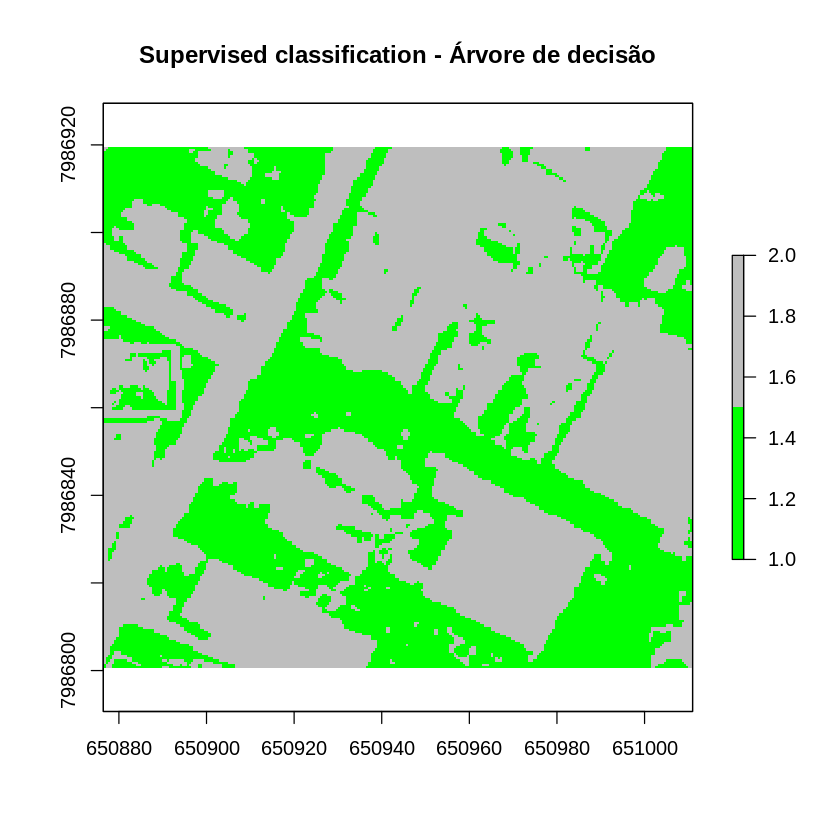

In [ ]:
mycolor <- c("green", "gray")

plot(imaClass, main = 'Supervised classification - Árvore de decisão', col=mycolor)